# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Prediccion de Ventas Futuras usando Series Temporales
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=179967pYtO8DZkFIiqkzKeDXpzKF13KE9)

![alt text](https://drive.google.com/uc?id=1MHVbje9FNlAbo-LOMlCvSYfpgzW7PQ4y)

![alt text](https://drive.google.com/uc?id=1DC-hoQNAxfDXEn91_BTF2B8qH904N8yq)

![alt text](https://drive.google.com/uc?id=1sM7eT88kpVmNMl7wJy0Jq0X_w-r783JF)

![alt text](https://drive.google.com/uc?id=1E6qCyK6SjFany6QsXw8lUc77CSOgjTkj)

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

TAREA #2.1: IMPORTAR EL DATASET DE VENTAS

In [3]:
# Debes incluir el enlace completo al archivo csv que contiene tu conjunto de datos
sales_train_df = pd.read_csv("train.csv").assign(
    Date=lambda df: pd.to_datetime(df.Date, format="%Y-%m-%d"), 
    StateHoliday=lambda df: df.StateHoliday.astype("category"))
sales_train_df.head(5)

C:\Users\jcr\AppData\Local\Temp\ipykernel_16608\3475167965.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("train.csv").assign(


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 63.1 MB


In [5]:
# Casi un millón de observaciones
# 1115 tiendas únicas 
# Notemos que las ventas es la variable objetivo (la que intentamos predecir)
# Id:  ID de transacción (combinación de la tienda y la fecha)
# Store: identificador único de la tienda
# Sales: ventas diarias, esta es la variable objetivo
# Customers: número de clientes de un día dado
# Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
# Promo: describe si la tienda tenía algún tipo de promoción ese día o no
# StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
# SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
# Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data

In [6]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
sales_train_df["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
sales_train_df["Date"].min(), sales_train_df["Date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [9]:
store_info_df = pd.read_csv("store.csv")
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# 9 columnas en total 
# 8 características, cada una con 1017209 puntos de datos
# 1 variable objetivo (ventas)
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# Cantidad de ventas promedio por día = 5773 Euros, ventas mínimas por día = 0, ventas máximas por día = 41551
# Número medio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


TAREA #2.2: IMPORTAR LA INFORMACIÓN SOBRE LAS TIENDAS



In [12]:
# StoreType: categoría que indica el tipo de tienda (a, b, c, d)
# Assortment:  a = básico, b = extra, c = extedido
# CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
# CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
# Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
# Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
# PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e.
# "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda

In [13]:
# Hagamos lo mismo con los datos store_info_df
# Hay que tener en cuenta que el data frame anterior incluye las transacciones registradas por día (en millones)
# Este data frame solo incluye información sobre las 1115 tiendas exclusivas que forman parte de este estudio

In [14]:
# De media, la distancia de la competencia es de 5404 metros (5,4 kms)

# TAREA #3: EXPLORAR EL DATASET

TAREA #3.1: EXPLORAR EL DATASET DE VENTAS

In [15]:
# Veamos si nos faltan datos, ¡esperemos que no sea así!
store_info_df.isnull().sum(), sales_train_df.isnull().sum()

(Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64,
 Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64)

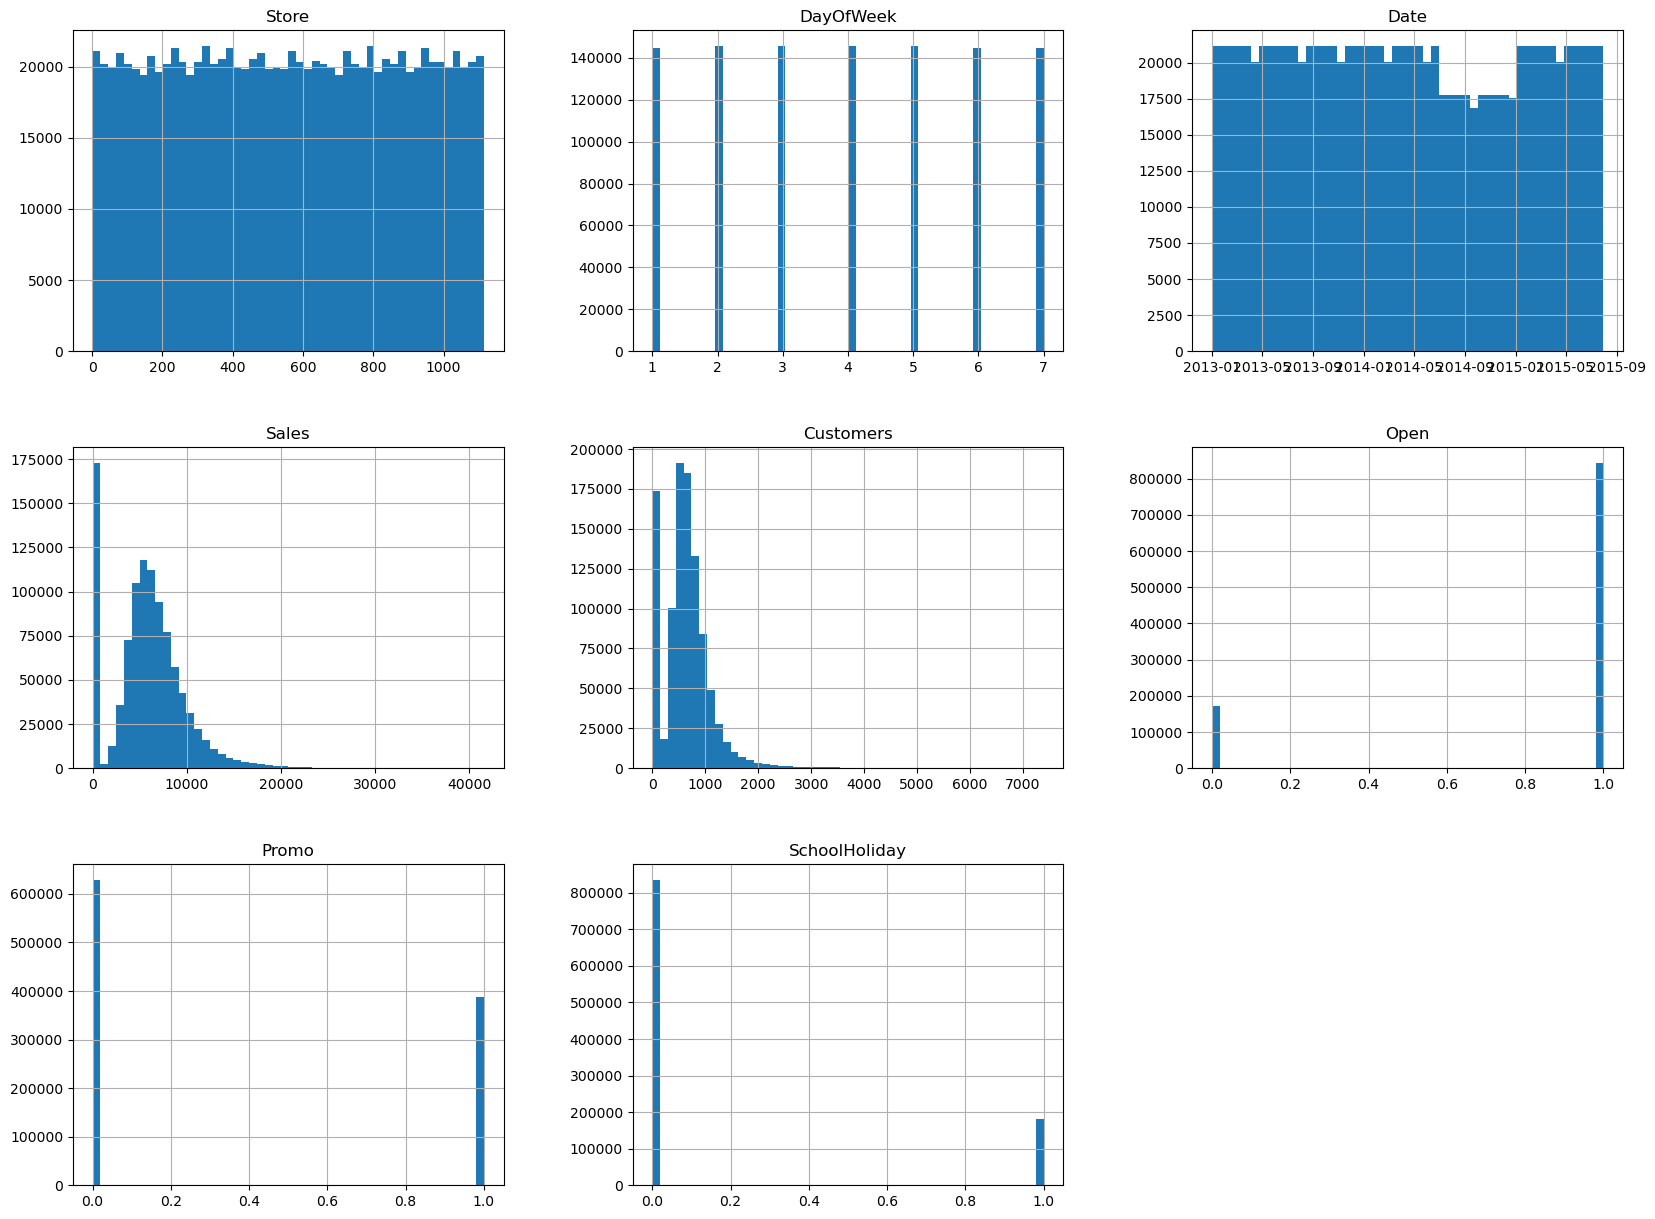

In [16]:
# Promedio de 600 clientes por día, el máximo es 4500 (¡tenga en cuenta que no podemos ver el valor atípico en 7388!)
# Los datos se distribuyen por igual en varios días de la semana (~ 150000 observaciones x 7 días = ~ 1,1 millones de observaciones)
# Las tiendas están abiertas ~ 80% del tiempo
# Los datos se distribuyen por igual entre todas las tiendas (sin sesgo)
# La promoción # 1 se ejecutó aproximadamente el 40% del tiempo
# Ventas promedio alrededor de 5000-6000 Euros
# Las vacaciones escolares duran alrededor del 18% del tiempo
sales_train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
# ¡Veamos cuántas tiendas están abiertas y cerradas!
sales_train_df["Open"].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [18]:
# nos quedamos solo con las tiendas abiertas y eliminamos las tiendas cerradas
sales_train_df = sales_train_df[sales_train_df["Open"] != 0]

In [19]:
# Eliminemos la columna open ya que ahora no tiene sentido
sales_train_df.drop("Open", axis=1, inplace=True)

In [20]:
sales_train_df.describe()
# Ventas promedio = 6955 Euros, número promedio de clientes = 762 (ha subido)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


TAREA #3.2: EXPLORAR LOS DATOS DE LA INFORMACIÓN DE LAS TIENDAS

In [21]:
# ¡Veamos si falta algún dato en el data frame de información de la tienda!
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
# Echemos un vistazo a los valores faltantes en la 'CompetitionDistance'
# Solo faltan 3 filas
store_info_df[store_info_df["CompetitionDistance"].isnull()]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [23]:
# Echemos un vistazo a los valores faltantes en el 'CompetitionOpenSinceMonth'
# Faltan muchas filas = 354 (casi un tercio de las 1115 tiendas)
store_info_df[store_info_df["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
# Parece que si 'promo2' es cero, 'promo2SinceWeek', 'Promo2SinceYear' y la información de 'PromoInterval' se establece en cero
# Hay 354 filas donde 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth' falta
# Establezcamos estos valores en ceros
store_info_df["CompetitionOpenSinceYear"].fillna(0, inplace=True)

In [25]:
# Hay 3 filas con valores de 'CompetitionDistance' que faltan, llenémoslas con valores promedio de la columna 'CompetitionDistance'
store_info_df["CompetitionDistance"].fillna(store_info_df["CompetitionDistance"].mean(), inplace=True)

In [26]:
# la mitad de las tiendas participan en la promoción 2
# la mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia)
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

TAREA #3.3: EXPLOREMOS EL DATASET COMBINADO

In [27]:
# Combinemos ambos data frames en función de 'store'
sales_train_all_df = sales_train_df.merge(store_info_df, on="Store", how="inner")

In [28]:
sales_train_all_df.to_csv("sales_train_all.csv", index=False)

In [29]:
# los clientes y la promoción se correlacionan positivamente con las ventas
# Promo2 no parece ser efectivo en absoluto
# find the correlation to sales
sales_train_all_df.corr()["Sales"].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

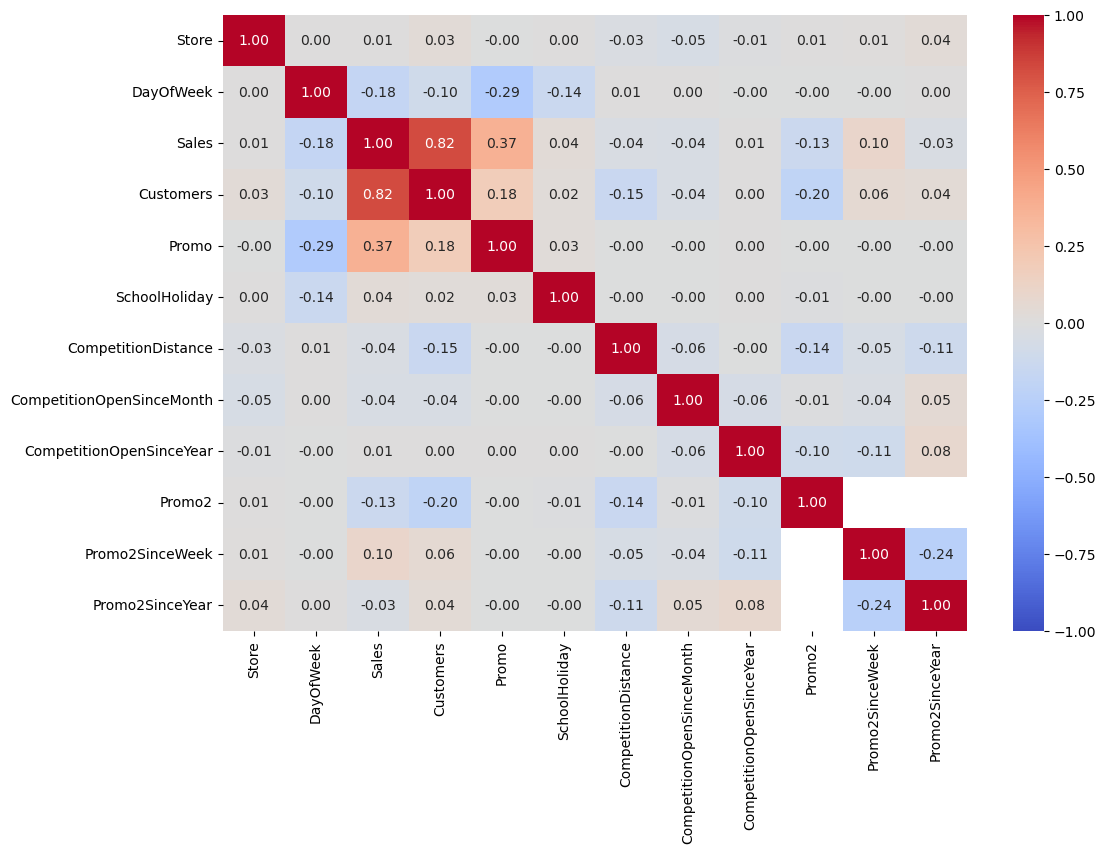

In [30]:
# heatmap with all the correlations
corr = sales_train_all_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', 
            # 2 digits for the values
            fmt= '.2f')
plt.show()

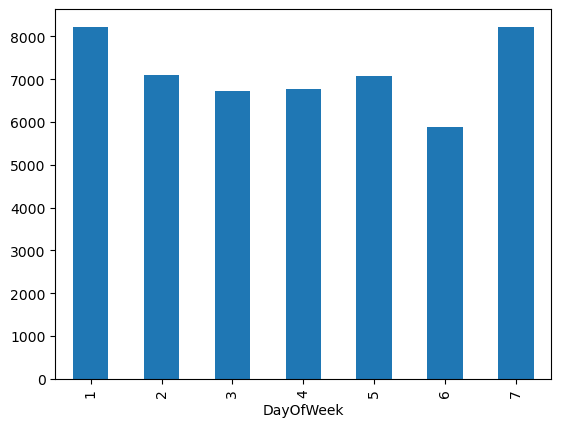

In [31]:
# plot relation between sales and day of week
sales_train_all_df.groupby("DayOfWeek")["Sales"].mean().plot(kind="bar")
plt.show()

In [32]:

# Los clientes / Promo2 y las ventas están fuertemente correlacionados

In [37]:
# Separemos el año y pongámoslo en una columna separada
sales_train_all_df["Year"] = sales_train_all_df["Date"].dt.year
# month
sales_train_all_df["Month"] = sales_train_all_df["Date"].dt.month
# day
sales_train_all_df["Day"] = sales_train_all_df["Date"].dt.day
# week day
sales_train_all_df["WeekDay"] = sales_train_all_df["Date"].dt.weekday


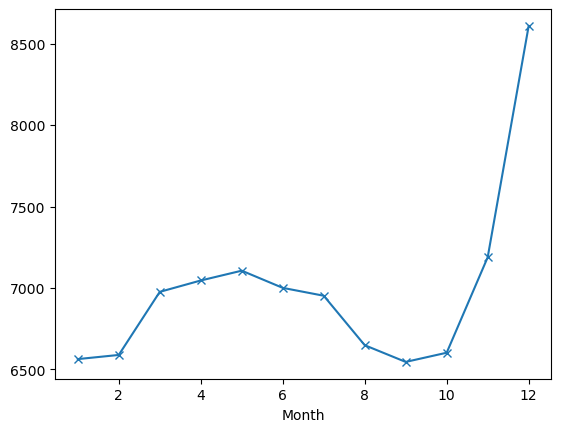

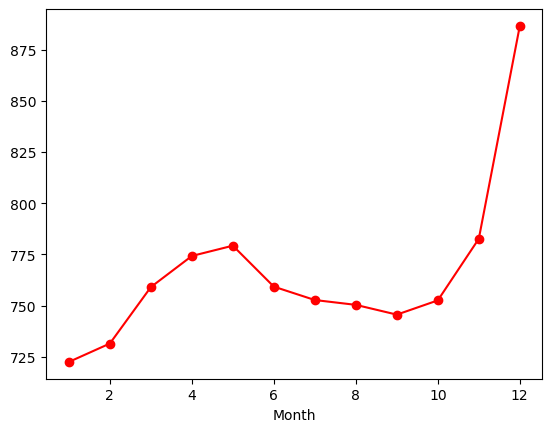

In [34]:
# Echemos un vistazo a las ventas promedio y la cantidad de clientes por mes.
# 'groupby' funciona muy bien al agrupar todos los datos que comparten la misma columna del mes, luego obtener la media de la columna de ventas
# Parece que las ventas y el número de clientes alcanzan su punto máximo en el período de Navidad
# line plot with pandas

sales_train_all_df.groupby(["Month"])["Sales"].mean().plot.line(marker="x", label="Sales")
plt.show()
sales_train_all_df.groupby(["Month"])["Customers"].mean().plot.line(marker="o", label="Customers", color="red")
plt.show()


# sales_train_all_df.groupby(["Month"])["Customers"].mean().plot(kind="line", label="Customers")

# TAREA # 4: ENTENDER LA INTUICIÓN DETRÁS DE FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1zk5cwXQvqci6hOwXoTSU0DY0Dpt1jNF0)

![alt text](https://drive.google.com/uc?id=10HNgyFmM1CG6yzSxpFudunUaHKNV_xBT)

![alt text](https://drive.google.com/uc?id=1BhEzmHYh_HKDWGz4eXP-clF7KAxJ_Od7)

# TAREA # 5: ENTRENAR AL MODELO PARTE A

In [35]:
import prophet 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


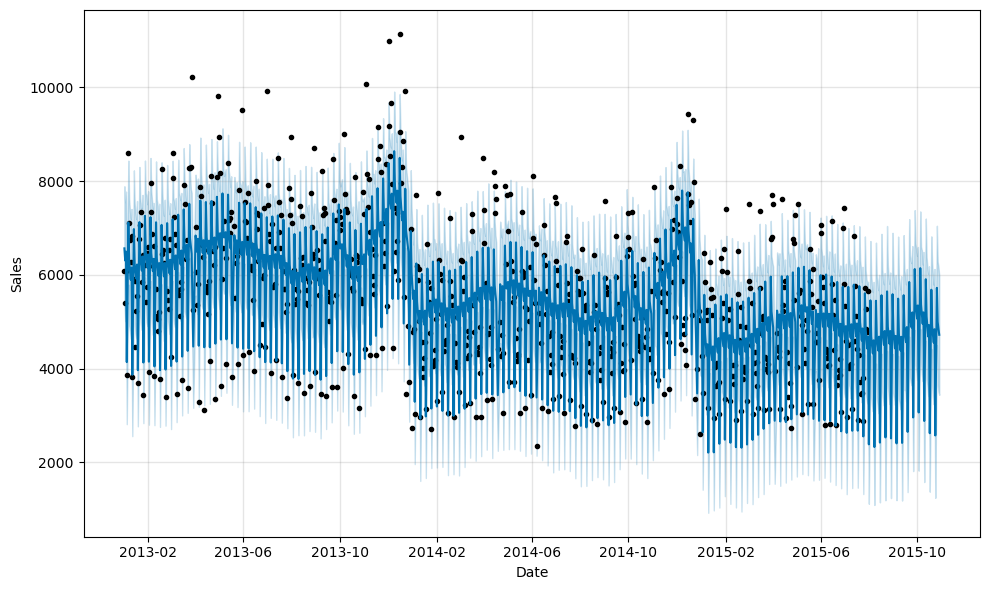

c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


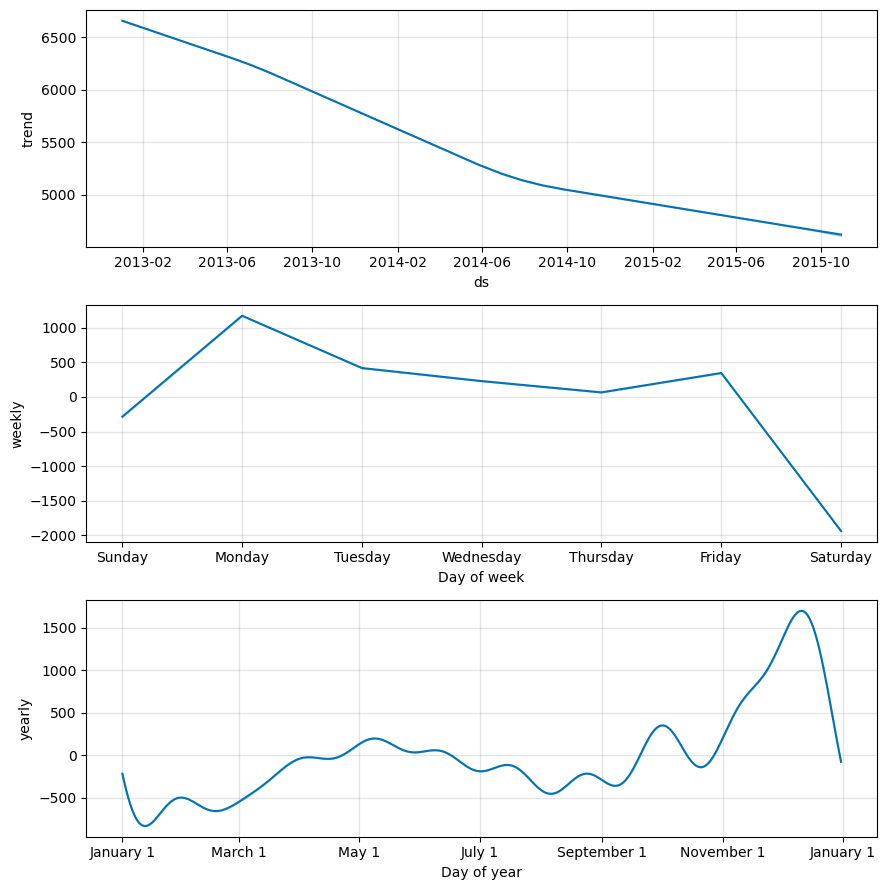

In [120]:
def sales_predictions(Store_ID, sales_df, periods):
    """
    This function takes a store ID, the sales dataframe and the number of periods to predict
    and returns a dataframe with the predictions for the next periods
    """
    sales_df = (
        sales_df[sales_df["Store"] == Store_ID]
        [["Date", "Sales"]]
        .rename(columns={"Date": "ds", "Sales": "y"})
        .sort_values("ds"))

    # create the model
    model = prophet.Prophet()
    # fit the model
    model.fit(sales_df)

    # create a dataframe with the dates to predict
    future = model.make_future_dataframe(periods=periods)
    # predict the sales
    forecast = model.predict(future)

    figure = model.plot(forecast, xlabel="Date", ylabel="Sales")
    plt.show()

    figure2 = model.plot_components(forecast)
    plt.show()

    return model


# Echemos un vistazo a las ventas de la tienda 1
# sales_train_all_df[sales_train_all_df["Store"] == 1][["Date", "Sales"]].plot(x="Date", y="Sales", figsize=(12, 8))
plt.show()

# predict sales store 1
model = sales_predictions(6, sales_train_all_df, 90)



# TAREA # 6: ENTRENAR AL MODELO PARTE B

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
  






In [121]:
def sales_predictions(Store_ID, sales_df, holidays, periods):
    """
    This function takes a store ID, the sales dataframe and the number of periods to predict
    and returns a dataframe with the predictions for the next periods
    """
    sales_df = (
        sales_df[sales_df["Store"] == Store_ID]
        [["Date", "Sales"]]
        .rename(columns={"Date": "ds", "Sales": "y"})
        .sort_values("ds"))

    # create the model
    model = prophet.Prophet(holidays=holidays)
    # fit the model
    model.fit(sales_df)

    # create a dataframe with the dates to predict
    future = model.make_future_dataframe(periods=periods)
    # predict the sales
    forecast = model.predict(future)

    figure = model.plot(forecast, xlabel="Date", ylabel="Sales")
    plt.show()

    figure2 = model.plot_components(forecast)
    plt.show()

In [122]:
school_holidays = (
    sales_train_all_df[
        sales_train_all_df["SchoolHoliday"] == 1]
    ["Date"]
    .unique())
school_holidays = pd.DataFrame({
    "ds": pd.to_datetime(school_holidays),
    "holiday": "school_holiday"
})
school_holidays.shape

(477, 2)

In [123]:
state_holidays = (
    sales_train_all_df[
        sales_train_all_df["StateHoliday"].isin(['a','b','c'])]
    ["Date"]
    .unique())
state_holidays = pd.DataFrame({
    "ds": pd.to_datetime(state_holidays),
    "holiday": "state_holiday"
})
state_holidays.shape

(35, 2)

In [124]:
school_state_holidays = pd.concat([school_holidays, state_holidays], axis=0)
school_state_holidays.shape

(512, 2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


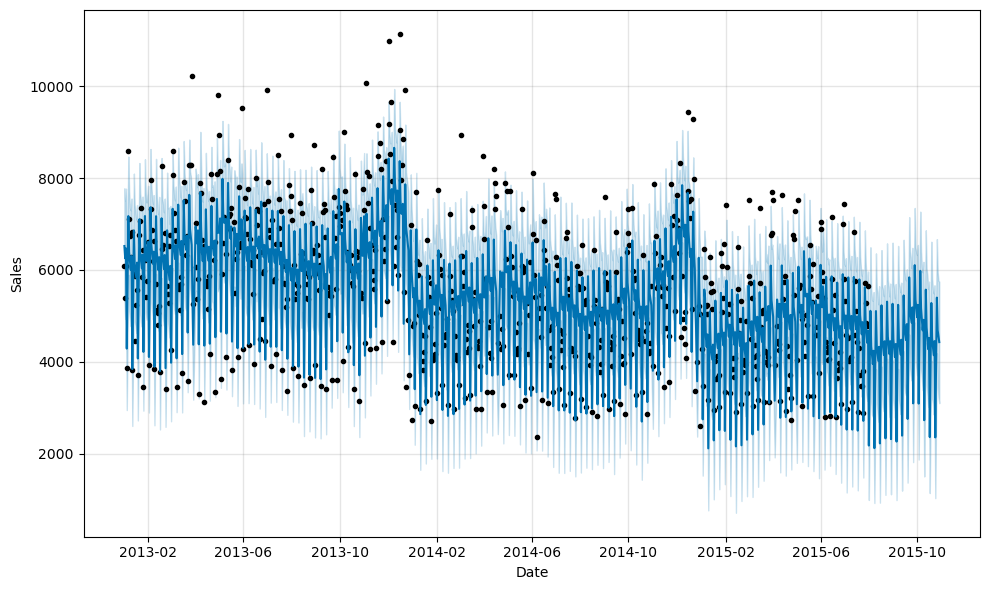

c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jcr\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


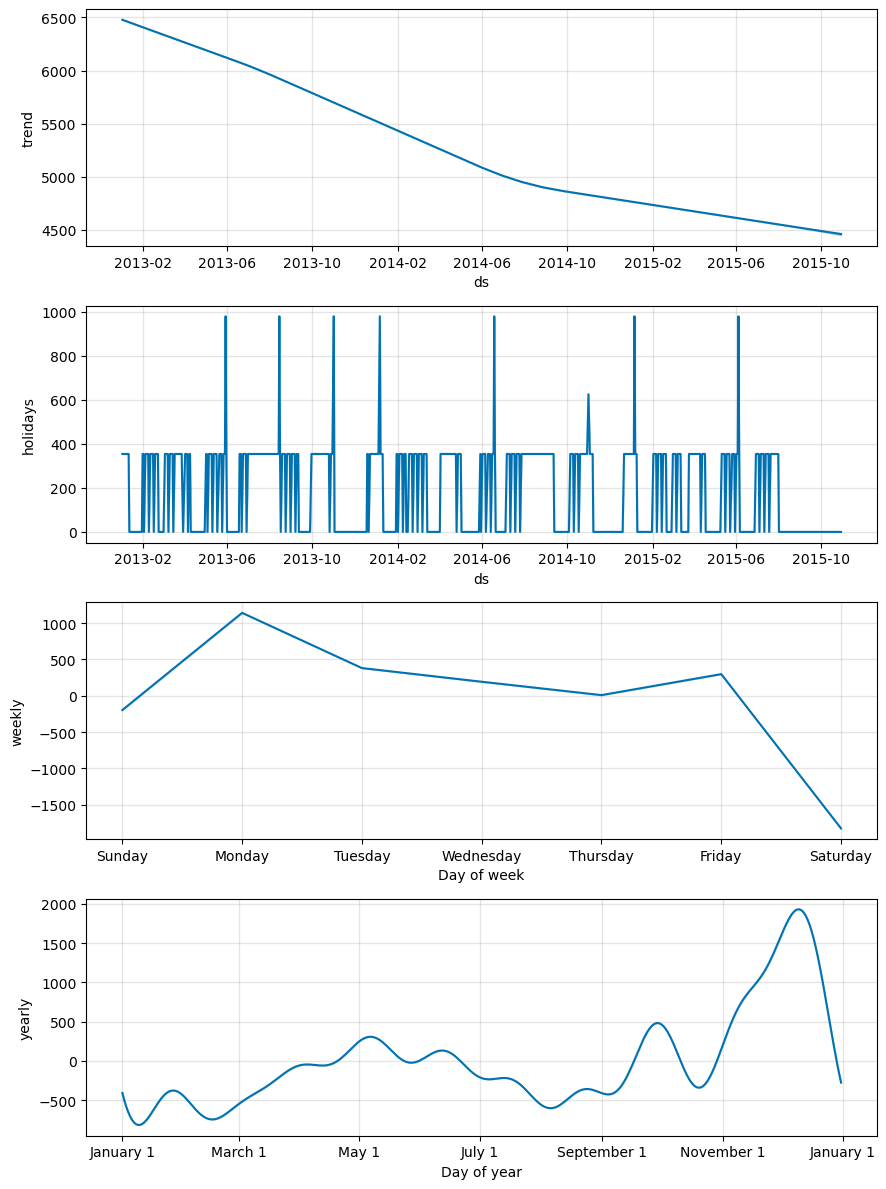

In [125]:
sales_predictions(6, sales_train_all_df, school_state_holidays, 90)